<a href="https://colab.research.google.com/github/zzzzz151/TAA-Project1/blob/master/neural_networks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [36]:
#Import relevant libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import learning_curve, validation_curve
from sklearn.preprocessing import StandardScaler

In [37]:
# Column 1: age in years
# Column 2: 1 = male, 0 = female
# Column 3: 1 = typical angina, 2 = atypical angina, 3 = non-anginal pain, 4 = asymptomatic
# Column 4: resting blood pressure in mmHg
# Column 5: in mg/dl
# Column 6: 1 means > 120 mg/dl, 0 means <= 120 mg/dl
# Column 7: resting electrocardiographic, 0 = normal, 1 = having ST-T wave abnormality, 2 = showing probable or definite left ventricular hypertrophy by Estes' criteria
# Column 8: max heart rate achieved
# Column 9: 1 = yes, 2 = no
# Column 10: ST depression induced by exercise relative to rest
# Column 11: slope of the peak exercise ST segment, 1 = upsloping, 2 = flat, 3 = downsloping
# Column 12: number of major vessels (0-3) colored by flourosopy
# Column 13: 3 = normal, 6 = fixed defect, 7 = reversable defect
# Column 14: >=1 means heart disease, 0 = no heart disease

myNames = ["age", # column 1
        "sex", # col 2
        "chestPainType", # col 3
        "restingBP", # col 4
        "serumCholesterol", # col 5
        "fastingBloodSugar", # col 6
        "restingEcg", # col 7
        "maxHeartRate", # col 8
        "exerciseInducedAngina", # col 9
        "stDepression", # col 10
        "stSlope", # col 11
        "majorVessels", # col 12
        "thalassemia", # col 13
        "diagnosis"] # col 14
assert len(myNames) == 14
data=pd.read_csv("data/processed.cleveland.data", sep=',', names=myNames, na_values=["?", '?'])
data = data.dropna() # Drop rows with missing data
data.iloc[:, -1] = data.iloc[:, -1].clip(0, 1) # clip last column (output) between 0 and 1, both inclusive


# Convert all columns to float
for name in myNames:
    data[name] = pd.to_numeric(data[name],errors = 'coerce')

m = data.shape[0] # num examples
n = data.shape[1] - 1 # num features

print("Num features:", n)
print("Num examples:", m)
    
# a few examples from the dataset 
print()
print(data.head())

X = data.values[:, :-1]
y = data.values[:, -1:]

categoricalColumnsNames = ["sex", 
                      "chestPainType", 
                      "fastingBloodSugar", 
                      "restingEcg", 
                      "exerciseInducedAngina", 
                      "stSlope",
                      "majorVessels",
                      "thalassemia"]
continuousColumns = data.drop(categoricalColumnsNames, axis=1)
continuousColumnsNames = [name for name in myNames if name not in categoricalColumnsNames and name != "diagnosis"]
categoricalColumns = data.drop(continuousColumnsNames, axis=1)
if "diagnosis" in continuousColumns:
    continuousColumns = continuousColumns.drop("diagnosis", axis=1)
if "diagnosis" not in categoricalColumns:
    categoricalColumns = data["diagnosis"]



Num features: 13
Num examples: 297

    age  sex  chestPainType  restingBP  serumCholesterol  fastingBloodSugar  \
0  63.0  1.0            1.0      145.0             233.0                1.0   
1  67.0  1.0            4.0      160.0             286.0                0.0   
2  67.0  1.0            4.0      120.0             229.0                0.0   
3  37.0  1.0            3.0      130.0             250.0                0.0   
4  41.0  0.0            2.0      130.0             204.0                0.0   

   restingEcg  maxHeartRate  exerciseInducedAngina  stDepression  stSlope  \
0         2.0         150.0                    0.0           2.3      3.0   
1         2.0         108.0                    1.0           1.5      2.0   
2         2.0         129.0                    1.0           2.6      2.0   
3         0.0         187.0                    0.0           3.5      3.0   
4         2.0         172.0                    0.0           1.4      1.0   

   majorVessels  thalassem

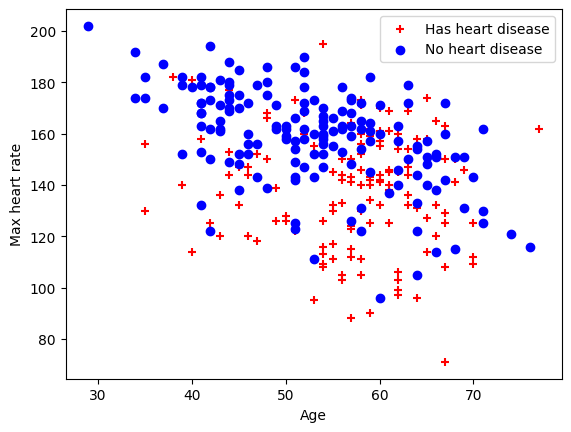

In [38]:
pos=(y==1)
neg=(y==0)
plt.scatter(X[pos[:,0],0],X[pos[:,0],7],c="r",marker="+", label = "Has heart disease")
plt.scatter(X[neg[:,0],0],X[neg[:,0],7],c="b",marker="o", label = "No heart disease")

plt.xlabel("Age")
plt.ylabel("Max heart rate")
#plt.ylim(,200)
plt.legend()
plt.show()

In [39]:
# Create a train-test split (75% train, 25% test)
X_train, X_test, y_train, y_test = train_test_split(data.drop("diagnosis", axis=1), 
                                                data["diagnosis"], 
                                                test_size=0.25, 
                                                random_state=60)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


## Unregularized Neural Network

In [40]:
# Create the neural network model with two hidden layers, each with 20 neurons
model = MLPClassifier(hidden_layer_sizes=(25, 25), activation='relu', solver='adam', max_iter=500)

# Train the model on the training data
model.fit(X_train, y_train.ravel())

/home/nudibranch/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=(25, 25), max_iter=500)

In [41]:
# Predict training set labels
y_pred_train = model.predict(X_train)
num_iterations = model.n_iter_

print("Training number of Iterations: ", num_iterations)

# Calculate the training accuracy
train_accuracy = accuracy_score(y_train, y_pred_train)

# Print training accuracy
print("Training Accuracy:", train_accuracy)

# Evaluate the model on the test data
y_pred_test = model.predict(X_test)

# Calculate the accuracy of the model on the test data
test_accuracy = accuracy_score(y_test, y_pred_test)

# Print test accuracy
print("Test Accuracy:", test_accuracy)

# Use k-fold cross-validation to estimate the accuracy of the model
cv_scores = cross_val_score(model, X, y.ravel(), cv=5)
mean_cv_score = cv_scores.mean()

# Print cross-validation scores
print("Cross-validation scores:", cv_scores)
print("Mean CV score:", mean_cv_score)

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred_test)
tn, fp, fn, tp = cm.ravel()

# Print confusion matrix with labels
print("Confusion Matrix:")
print("                Predicted No    Predicted Yes")
print("Actual No        ", tn, "            ", fp)
print("Actual Yes       ", fn, "             ", tp)

# Generate classification report
cr = classification_report(y_test, y_pred_test)

# Print classification report
print("\nClassification Report:")
print(cr)


Training number of Iterations:  500
Training Accuracy: 0.9954954954954955
Test Accuracy: 0.7733333333333333
Cross-validation scores: [0.85       0.85       0.72881356 0.79661017 0.77966102]
Mean CV score: 0.8010169491525424
Confusion Matrix:
                Predicted No    Predicted Yes
Actual No         29              15
Actual Yes        2               29

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.66      0.77        44
           1       0.66      0.94      0.77        31

    accuracy                           0.77        75
   macro avg       0.80      0.80      0.77        75
weighted avg       0.82      0.77      0.77        75



### Learning Curve

/home/nudibranch/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/nudibranch/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/nudibranch/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/nudibranch/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/nudibranch/.local/lib/pyth

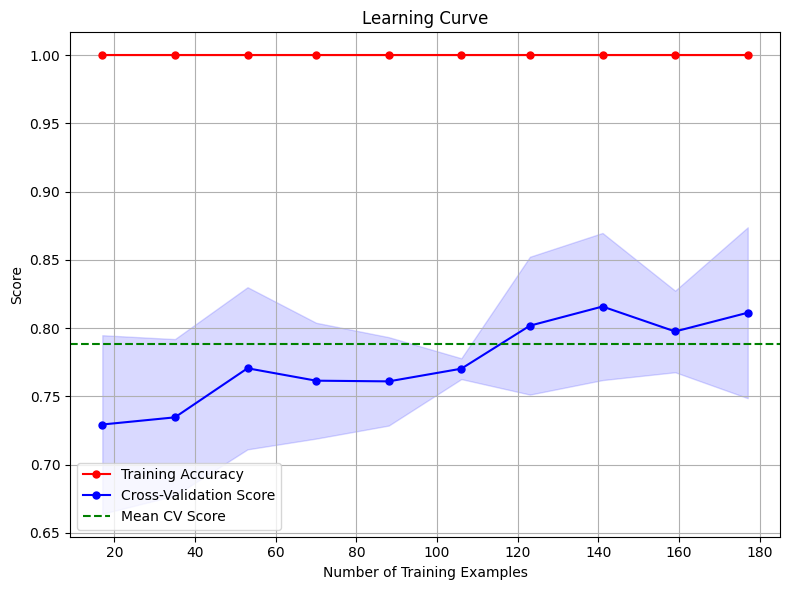

In [42]:

# Define the number of training examples at which to evaluate the learning curve
train_sizes, train_scores, test_scores = learning_curve(
    model, X_train, y_train.ravel(), cv=5, train_sizes=np.linspace(0.1, 1.0, 10), scoring='accuracy')

# Calculate the mean and standard deviation of the training and test scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Calculate the cross-validation scores
cv_scores = cross_val_score(model, X_train, y_train.ravel(), cv=5, scoring='accuracy')

# Plot the learning curve
plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_mean, color='r', marker='o', markersize=5, label='Training Accuracy')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.15, color='r')
plt.plot(train_sizes, test_mean, color='b', marker='o', markersize=5, label='Cross-Validation Score')
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.15, color='b')
plt.axhline(y=np.mean(cv_scores), color='g', linestyle='--', label='Mean CV Score')  # Add line for mean CV score
plt.xlabel('Number of Training Examples')
plt.ylabel('Score')
plt.title('Learning Curve')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()



### Loss Validation

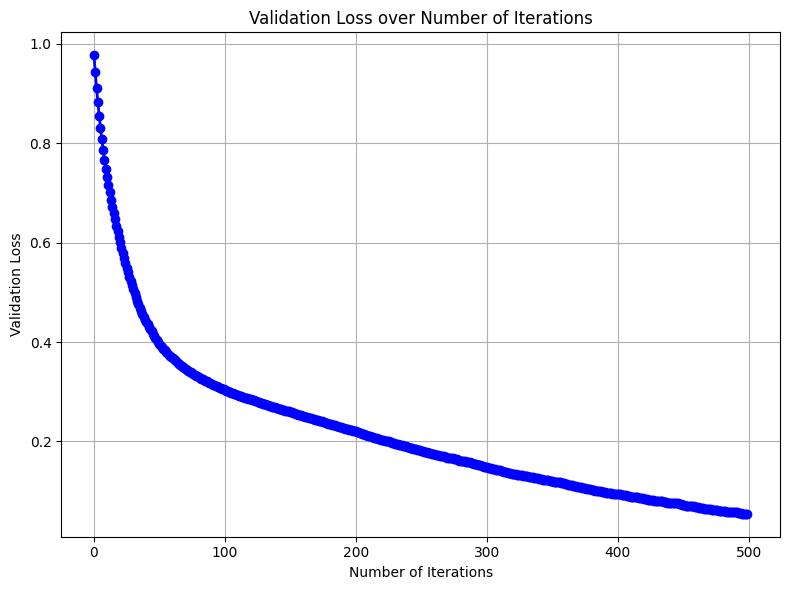

In [43]:
# Get the validation loss from the new model
validation_loss = model.loss_curve_

# Plot the validation loss
plt.figure(figsize=(8, 6))
plt.plot(validation_loss, marker='o', color='b', linewidth=2)
plt.xlabel('Number of Iterations')
plt.ylabel('Validation Loss')
plt.title('Validation Loss over Number of Iterations')
plt.grid(True)
plt.tight_layout()
plt.show()


### Testing different learning rates and Number of Neurons


/home/nudibranch/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/nudibranch/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/nudibranch/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/nudibranch/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/nudibranch/.local/lib/pyth

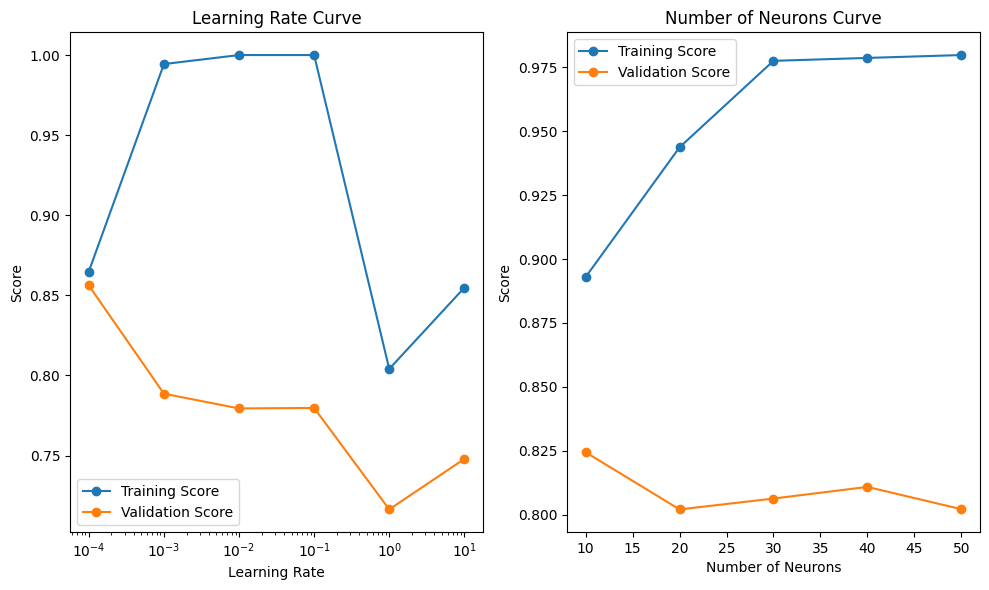

In [44]:
learning_rates = [0.0001, 0.001, 0.01, 0.1, 1, 10]  # Specify different learning rates
neurons = [10, 20, 30, 40, 50]  # Specify different number of neurons

# Learning Rate Curve
param_range_lr = learning_rates
train_scores_lr, test_scores_lr = validation_curve(
    MLPClassifier(max_iter=500),
    X_train, y_train.ravel(),
    param_name='learning_rate_init',
    param_range=param_range_lr,
    cv=5
)

# Number of Neurons Curve
param_range_neurons = neurons
train_scores_neurons, test_scores_neurons = validation_curve(
    MLPClassifier(max_iter=500),
    X_train, y_train.ravel(),
    param_name='hidden_layer_sizes',
    param_range=param_range_neurons,
    cv=5
)

# Plotting the curves
plt.figure(figsize=(10, 6))

# Learning Rate Curve
plt.subplot(1, 2, 1)
plt.plot(learning_rates, np.mean(train_scores_lr, axis=1), marker='o', label='Training Score')
plt.plot(learning_rates, np.mean(test_scores_lr, axis=1), marker='o', label='Validation Score')
plt.xscale('log')
plt.xlabel('Learning Rate')
plt.ylabel('Score')
plt.title('Learning Rate Curve')
plt.legend()

# Number of Neurons Curve
plt.subplot(1, 2, 2)
plt.plot(neurons, np.mean(train_scores_neurons, axis=1), marker='o', label='Training Score')
plt.plot(neurons, np.mean(test_scores_neurons, axis=1), marker='o', label='Validation Score')
plt.xlabel('Number of Neurons')
plt.ylabel('Score')
plt.title('Number of Neurons Curve')
plt.legend()

plt.tight_layout()
plt.show()


### Hyperparameter Tuning using GridSearchCV

In [45]:
# Hyperparameter tuning using GridSearchCV
# GridSearchCV performs exaustive search over a specified hyperparameter space to find the best model with the highest cross validation score
param_grid = {
    'hidden_layer_sizes': [(10,), (20,), (30,), (10,10), (20,20), (30,30)],
    'activation': ['relu', 'tanh'],
    'solver': ['sgd', 'adam'],
    'learning_rate': ['constant', 'adaptive']
}
grid_search = GridSearchCV(model, param_grid, cv=5)

# Fit the GridSearchCV object to the data
grid_search.fit(X_train, y_train.ravel())

# Print the best hyperparameters found
print("Best hyperparameters: ", grid_search.best_params_)

# Print the accuracy of the best model
print("Best Cross Validation Score: ", grid_search.best_score_)

/home/nudibranch/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/nudibranch/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/nudibranch/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/nudibranch/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/nudibranch/.local/lib/pyth

Best hyperparameters:  {'activation': 'tanh', 'hidden_layer_sizes': (30,), 'learning_rate': 'constant', 'solver': 'sgd'}
Best Cross Validation Score:  0.8518181818181818


In [46]:
# Create a new model object with the optimal hyperparameters
optimal_model = MLPClassifier(**grid_search.best_params_)

# Train the model on the training data
optimal_model.fit(X_train, y_train.ravel())

/home/nudibranch/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(activation='tanh', hidden_layer_sizes=(30,), solver='sgd')

In [47]:
# Predict training set labels
y_pred_train = optimal_model.predict(X_train)
num_iterations = optimal_model.n_iter_

print("Training number of Iterations: ", num_iterations)

# Calculate the training accuracy
train_accuracy = accuracy_score(y_train, y_pred_train)

# Print training accuracy
print("Training Accuracy:", train_accuracy)

# Evaluate the model on the test data
y_pred_test = optimal_model.predict(X_test)

# Calculate the accuracy of the model on the test data
test_accuracy = accuracy_score(y_test, y_pred_test)

# Print test accuracy
print("Test Accuracy:", test_accuracy)

# Use k-fold cross-validation to estimate the accuracy of the model
cv_scores = cross_val_score(optimal_model, X, y.ravel(), cv=5)
mean_cv_score = cv_scores.mean()

# Print cross-validation scores
print("Cross-validation scores:", cv_scores)
print("Mean CV score:", mean_cv_score)

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred_test)
tn, fp, fn, tp = cm.ravel()

# Print confusion matrix with labels
print("Confusion Matrix:")
print("                Predicted No    Predicted Yes")
print("Actual No        ", tn, "            ", fp)
print("Actual Yes       ", fn, "             ", tp)

# Generate classification report
cr = classification_report(y_test, y_pred_test)

# Print classification report
print("\nClassification Report:")
print(cr)


Training number of Iterations:  200
Training Accuracy: 0.8468468468468469
Test Accuracy: 0.7866666666666666
Cross-validation scores: [0.61666667 0.61666667 0.6779661  0.6440678  0.62711864]
Mean CV score: 0.6364971751412429
Confusion Matrix:
                Predicted No    Predicted Yes
Actual No         34              10
Actual Yes        6               25

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.77      0.81        44
           1       0.71      0.81      0.76        31

    accuracy                           0.79        75
   macro avg       0.78      0.79      0.78        75
weighted avg       0.79      0.79      0.79        75



/home/nudibranch/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


## Learning Curve

/home/nudibranch/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/nudibranch/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/nudibranch/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/nudibranch/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/nudibranch/.local/lib/pyth

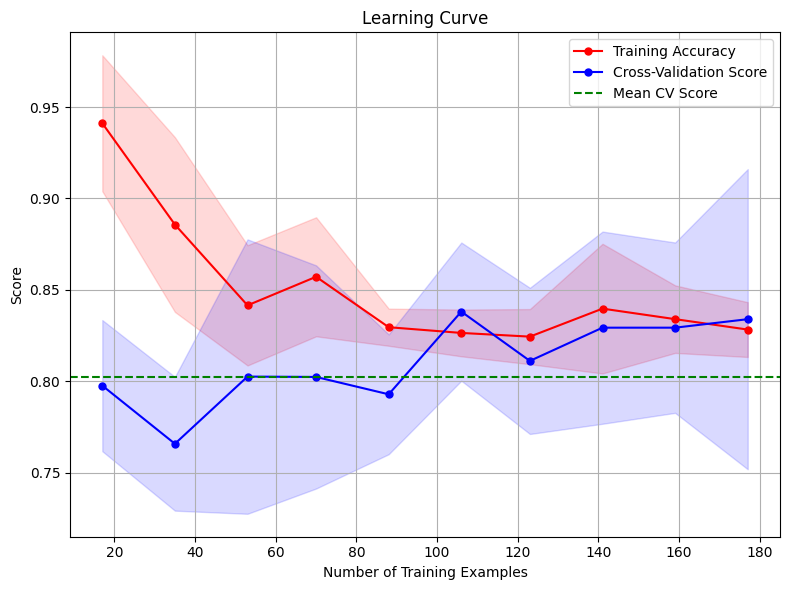

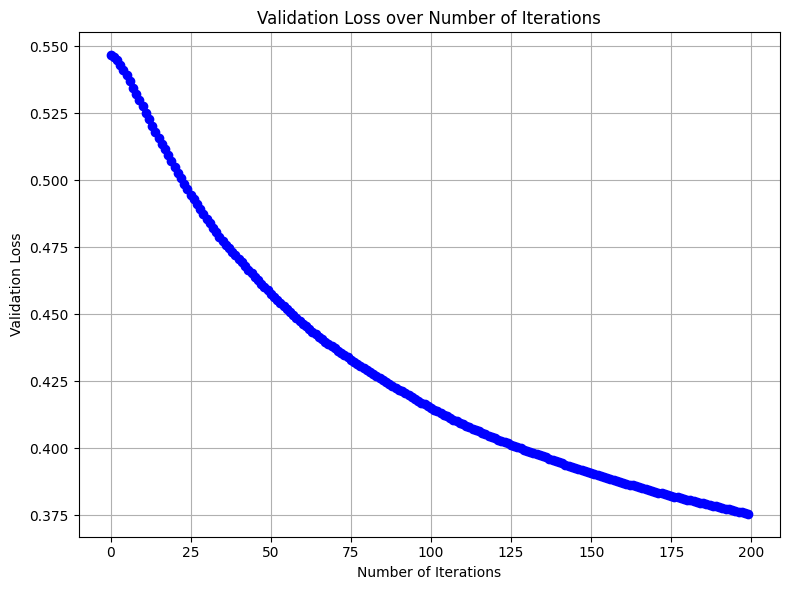

In [48]:

# Define the number of training examples at which to evaluate the learning curve
train_sizes, train_scores, test_scores = learning_curve(
    optimal_model, X_train, y_train.ravel(), cv=5, train_sizes=np.linspace(0.1, 1.0, 10), scoring='accuracy')

# Calculate the mean and standard deviation of the training and test scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Calculate the cross-validation scores
cv_scores = cross_val_score(optimal_model, X_train, y_train.ravel(), cv=5, scoring='accuracy')

# Plot the learning curve
plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_mean, color='r', marker='o', markersize=5, label='Training Accuracy')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.15, color='r')
plt.plot(train_sizes, test_mean, color='b', marker='o', markersize=5, label='Cross-Validation Score')
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.15, color='b')
plt.axhline(y=np.mean(cv_scores), color='g', linestyle='--', label='Mean CV Score')  # Add line for mean CV score
plt.xlabel('Number of Training Examples')
plt.ylabel('Score')
plt.title('Learning Curve')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Get the validation loss from the new model
validation_loss = optimal_model.loss_curve_

# Plot the validation loss
plt.figure(figsize=(8, 6))
plt.plot(validation_loss, marker='o', color='b', linewidth=2)
plt.xlabel('Number of Iterations')
plt.ylabel('Validation Loss')
plt.title('Validation Loss over Number of Iterations')
plt.grid(True)
plt.tight_layout()
plt.show()



## Regularized version of Neural Network

/home/nudibranch/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/nudibranch/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/nudibranch/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/nudibranch/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/nudibranch/.local/lib/pyth

Best Alpha Parameter: 10


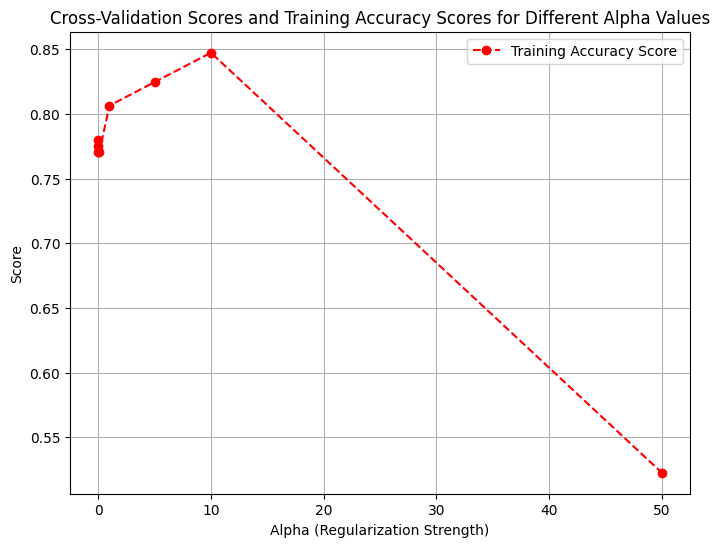

In [49]:

alpha_values = [0.0001, 0.001, 0.01, 0.1, 1, 5, 10, 50]  # Specify different alpha values

# Create an empty list to store the cross-validation scores and training accuracy scores
cv_scores = []
train_scores = []

# Perform grid search with cross-validation for each alpha value
for alpha in alpha_values:
    # Create the neural network model with two hidden layers, each with 30 neurons and the current alpha value
    model = MLPClassifier(hidden_layer_sizes=(30, 30), activation='relu', solver='adam', max_iter=500, alpha=alpha, random_state=42)
    
    # Perform cross-validation to get the cross-validation scores
    cv_score = np.mean(cross_val_score(model, X_train, y_train, cv=5))
    cv_scores.append(cv_score)
    
    # Perform cross-validation again to get the training accuracy scores
    train_score = np.mean(cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy'))
    train_scores.append(train_score)

best_alpha_index = np.argmax(cv_scores)
best_alpha = alpha_values[best_alpha_index]

print("Best Alpha Parameter:", best_alpha)

# Plot the line graph of cross-validation scores and training accuracy scores
plt.figure(figsize=(8, 6))  # Set the figure size

plt.plot(alpha_values, train_scores, linestyle='--', marker='o', color='r', label='Training Accuracy Score')

plt.xlabel('Alpha (Regularization Strength)')
plt.ylabel('Score')
plt.title('Cross-Validation Scores and Training Accuracy Scores for Different Alpha Values')
plt.legend()
plt.grid(True)  # Display grid lines
plt.show()


In [50]:

# Create a new model with the best alpha value
best_model = MLPClassifier(hidden_layer_sizes=(30, 30), activation='relu', solver='adam', max_iter=500, alpha=best_alpha)

# Train the new model on the training data
best_model.fit(X_train, y_train.ravel())

MLPClassifier(alpha=10, hidden_layer_sizes=(30, 30), max_iter=500)

In [51]:
# Predict training set labels
y_pred_train = best_model.predict(X_train)
num_iterations = best_model.n_iter_

print("Training number of Iterations: ", num_iterations)

# Calculate the training accuracy
train_accuracy = accuracy_score(y_train, y_pred_train)

# Print training accuracy
print("Training Accuracy:", train_accuracy)

# Evaluate the model on the test data
y_pred_test = best_model.predict(X_test)

# Calculate the accuracy of the model on the test data
test_accuracy = accuracy_score(y_test, y_pred_test)

# Print test accuracy
print("Test Accuracy:", test_accuracy)

# Use k-fold cross-validation to estimate the accuracy of the model
cv_scores = cross_val_score(best_model, X, y.ravel(), cv=5)
mean_cv_score = cv_scores.mean()

# Print cross-validation scores
print("Cross-validation scores:", cv_scores)
print("Mean CV score:", mean_cv_score)

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred_test)
tn, fp, fn, tp = cm.ravel()

# Print confusion matrix with labels
print("Confusion Matrix:")
print("                Predicted No    Predicted Yes")
print("Actual No        ", tn, "            ", fp)
print("Actual Yes       ", fn, "             ", tp)

# Generate classification report
cr = classification_report(y_test, y_pred_test)

# Print classification report
print("\nClassification Report:")
print(cr)


Training number of Iterations:  336
Training Accuracy: 0.8423423423423423
Test Accuracy: 0.8133333333333334
Cross-validation scores: [0.68333333 0.76666667 0.72881356 0.79661017 0.76271186]
Mean CV score: 0.7476271186440678
Confusion Matrix:
                Predicted No    Predicted Yes
Actual No         36              8
Actual Yes        6               25

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.82      0.84        44
           1       0.76      0.81      0.78        31

    accuracy                           0.81        75
   macro avg       0.81      0.81      0.81        75
weighted avg       0.82      0.81      0.81        75



/home/nudibranch/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/nudibranch/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/nudibranch/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/nudibranch/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/nudibranch/.local/lib/pyth

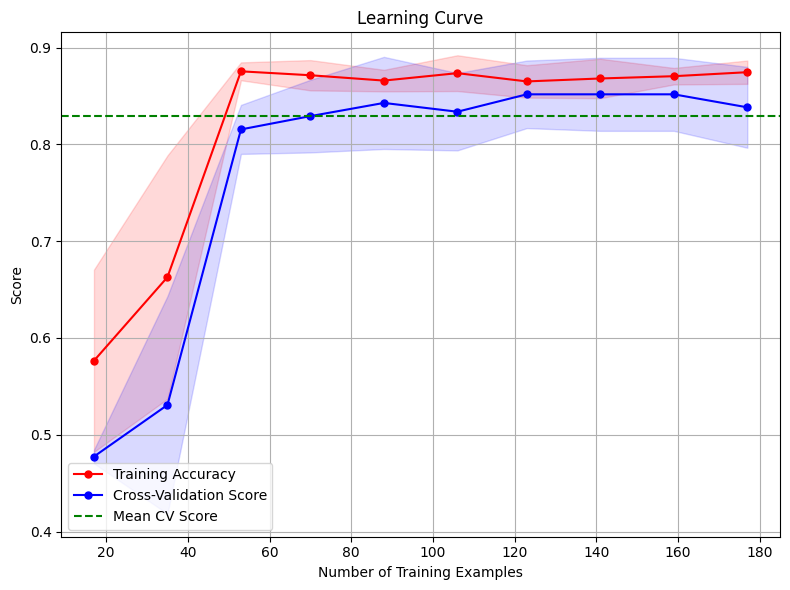

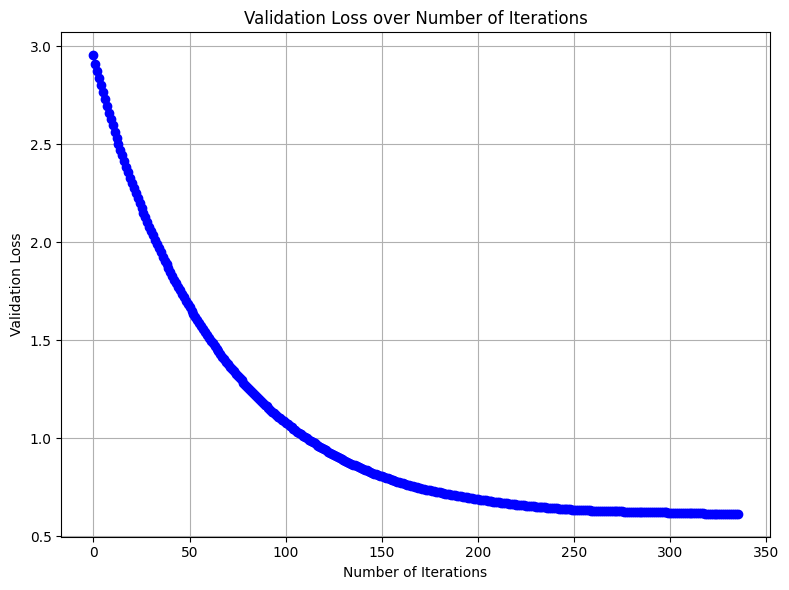

In [52]:

# Define the number of training examples at which to evaluate the learning curve
train_sizes, train_scores, test_scores = learning_curve(
    best_model, X_train, y_train.ravel(), cv=5, train_sizes=np.linspace(0.1, 1.0, 10), scoring='accuracy')

# Calculate the mean and standard deviation of the training and test scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Calculate the cross-validation scores
cv_scores = cross_val_score(best_model, X_train, y_train.ravel(), cv=5, scoring='accuracy')

# Plot the learning curve
plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_mean, color='r', marker='o', markersize=5, label='Training Accuracy')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.15, color='r')
plt.plot(train_sizes, test_mean, color='b', marker='o', markersize=5, label='Cross-Validation Score')
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.15, color='b')
plt.axhline(y=np.mean(cv_scores), color='g', linestyle='--', label='Mean CV Score')  # Add line for mean CV score
plt.xlabel('Number of Training Examples')
plt.ylabel('Score')
plt.title('Learning Curve')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


# Get the validation loss from the new model
validation_loss = best_model.loss_curve_

# Plot the validation loss
plt.figure(figsize=(8, 6))
plt.plot(validation_loss, marker='o', color='b', linewidth=2)
plt.xlabel('Number of Iterations')
plt.ylabel('Validation Loss')
plt.title('Validation Loss over Number of Iterations')
plt.grid(True)
plt.tight_layout()
plt.show()
